# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn import metrics


In [6]:
# Your code here! :)
#from sklearn.cross_validation import cross_val_score

df = pd.read_csv('GermanCredit.csv')
X = df.drop('Class', axis=1)
Y = df['Class']

#splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
#print(len(X_train))
#print(len(Y_test))
#print("------------------")
#print(X_train.shape)

clf_tree = DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, Y_train)
#print(Y_train)

#I perform some predictions
Y_test_pred = clf_tree.predict(X_test)
Y_train_pred = clf_tree.predict(X_train)

#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set: %.2f%%" % (metrics.accuracy_score(Y_test, Y_test_pred)*100.0))
print("Accuracy on train set: %.2f%%" % (metrics.accuracy_score(Y_train, Y_train_pred)*100.0))

model_comparison = {}
model_comparison["DecisionTreeClassifier"] = metrics.accuracy_score(Y_test, Y_test_pred)


#using cross validation with 10 splits
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
clf_tree_kfold = DecisionTreeClassifier()
results_kfold = cross_val_score(clf_tree_kfold, X_train, Y_train, cv=kfold)
print("Accuracy cross validation 10 splits: %.2f%%" % (results_kfold.mean()*100.0)) 


model_comparison["DecisionTreeClassifier-cross_val"] = results_kfold.mean()


Accuracy on test set: 65.00%
Accuracy on train set: 100.00%
Accuracy cross validation 10 splits: 70.00%


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of 
your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [ ]:
! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

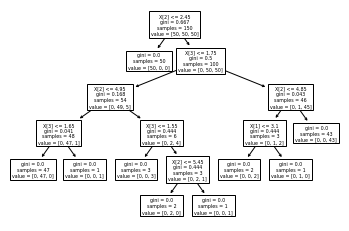

In [7]:
#printing using sklearn, since I am having some trouble with dtreeviz

from sklearn.datasets import load_iris
from sklearn import tree
X_train, Y_train = load_iris(return_X_y=True)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
tree.plot_tree(clf)

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Your code here! :)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
clf_forest = RandomForestClassifier(n_estimators=100)
clf_forest = clf_forest.fit(X_train, Y_train)

#I perform some predictions
Y_test_pred = clf_forest.predict(X_test)
Y_train_pred = clf_forest.predict(X_train)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set: %.2f%%" % (metrics.accuracy_score(Y_test, Y_test_pred)*100.0))
print("Accuracy on train set: %.2f%%" % (metrics.accuracy_score(Y_train, Y_train_pred)*100.0))

model_comparison["RandomForestClassifier"] = metrics.accuracy_score(Y_test, Y_test_pred)

#using cross validation with 10 splits
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
clf_forest_kfold = RandomForestClassifier()
results_kfold = cross_val_score(clf_forest_kfold, X_train, Y_train, cv=kfold)
print("Accuracy cross validation: %.2f%%" % (results_kfold.mean()*100.0)) 

model_comparison["RandomForestClassifier-cross_val"] = results_kfold.mean()


Accuracy on test set: 75.67%
Accuracy on train set: 100.00%
Accuracy cross validation: 76.43%


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

Feature ranking:
1. feature 1 (0.094696)
2. feature 4 (0.077443)
3. feature 0 (0.073946)
4. feature 12 (0.052815)
5. feature 2 (0.038939)
6. feature 3 (0.033353)
7. feature 9 (0.030668)
8. feature 10 (0.028202)
9. feature 17 (0.021671)
10. feature 18 (0.018576)
11. feature 29 (0.017326)
12. feature 5 (0.017153)
13. feature 7 (0.016864)
14. feature 41 (0.016599)
15. feature 47 (0.016416)
16. feature 35 (0.015417)
17. feature 49 (0.015097)
18. feature 53 (0.015011)
19. feature 20 (0.014999)
20. feature 51 (0.014956)
21. feature 33 (0.014877)
22. feature 15 (0.014704)
23. feature 59 (0.014653)
24. feature 34 (0.014509)
25. feature 40 (0.014258)
26. feature 55 (0.013989)
27. feature 21 (0.013771)
28. feature 36 (0.013546)
29. feature 48 (0.012849)
30. feature 50 (0.012723)
31. feature 19 (0.012468)
32. feature 60 (0.012362)
33. feature 14 (0.011797)
34. feature 13 (0.011600)
35. feature 58 (0.011361)
36. feature 54 (0.011249)
37. feature 6 (0.011144)
38. feature 37 (0.010988)
39. feature 1

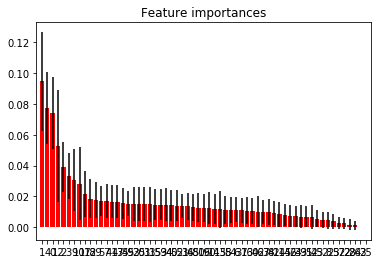

In [10]:
# Your code here
import matplotlib.pyplot as plt


importances = clf_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [ ]:
# Your code here!

X = df.drop('Class', axis=1)
Y = df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# test pdpbox
import pdpbox
from pdpbox import pdp 
pdp_duration_amount = pdp.pdp_interact(clf_forest,model_features=df[list(X.columns)],['Duration','Amount'])
pdp.pdp_interact_plot(pdp_duration_amount, ['Duration','Amount'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)


## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

In [16]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("Accuracy on test set: %.2f%%" % (metrics.accuracy_score(Y_test, Y_test_pred)*100.0))
print("Accuracy on train set: %.2f%%" % (metrics.accuracy_score(Y_train, Y_train_pred)*100.0))

model_comparison["XGBClassifier"] = metrics.accuracy_score(Y_test, Y_test_pred)

#using cross validation with 10 splits
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
clf_xgb_kfold = xgb.XGBClassifier()
results_kfold = cross_val_score(clf_xgb_kfold, X_train, Y_train, cv=kfold)
print("Accuracy cross validation: %.2f%%" % (results_kfold.mean()*100.0)) 

model_comparison["XGBClassifier_cross-val"] = results_kfold.mean()


Accuracy on test set: 77.00%
Accuracy on train set: 90.29%
Accuracy cross validation: 74.71%


In [17]:
import catboost as ctb
import lightgbm as lgbm

model = ctb.CatBoostClassifier()
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("Accuracy on test set: %.2f%%" % (metrics.accuracy_score(Y_test, Y_test_pred)*100.0))
print("Accuracy on train set: %.2f%%" % (metrics.accuracy_score(Y_train, Y_train_pred)*100.0))

model_comparison["CatBoostClassifier"] = metrics.accuracy_score(Y_test, Y_test_pred)


#using cross validation with 10 splits
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
clf_ctb_kfold = ctb.CatBoostClassifier()
results_kfold = cross_val_score(clf_ctb_kfold, X_train, Y_train, cv=kfold)
print("Accuracy cross validation: %.2f%%" % (results_kfold.mean()*100.0)) 

model_comparison["CatBoostClassifier"] = results_kfold.mean()


Learning rate set to 0.008847
0:	learn: 0.6895652	total: 162ms	remaining: 2m 42s
1:	learn: 0.6857336	total: 169ms	remaining: 1m 24s
2:	learn: 0.6825920	total: 172ms	remaining: 57.1s
3:	learn: 0.6790674	total: 175ms	remaining: 43.7s
4:	learn: 0.6753890	total: 179ms	remaining: 35.6s
5:	learn: 0.6716543	total: 181ms	remaining: 30.1s
6:	learn: 0.6681092	total: 184ms	remaining: 26.1s
7:	learn: 0.6646701	total: 187ms	remaining: 23.2s
8:	learn: 0.6611235	total: 190ms	remaining: 20.9s
9:	learn: 0.6577066	total: 193ms	remaining: 19.1s
10:	learn: 0.6543585	total: 196ms	remaining: 17.7s
11:	learn: 0.6515983	total: 199ms	remaining: 16.4s
12:	learn: 0.6486692	total: 202ms	remaining: 15.3s
13:	learn: 0.6457365	total: 206ms	remaining: 14.5s
14:	learn: 0.6425024	total: 210ms	remaining: 13.8s
15:	learn: 0.6403008	total: 217ms	remaining: 13.3s
16:	learn: 0.6376316	total: 220ms	remaining: 12.7s
17:	learn: 0.6345853	total: 224ms	remaining: 12.2s
18:	learn: 0.6317844	total: 227ms	remaining: 11.7s
19:	learn

200:	learn: 0.4269756	total: 699ms	remaining: 2.78s
201:	learn: 0.4261827	total: 702ms	remaining: 2.77s
202:	learn: 0.4256699	total: 705ms	remaining: 2.77s
203:	learn: 0.4252564	total: 707ms	remaining: 2.76s
204:	learn: 0.4245709	total: 710ms	remaining: 2.75s
205:	learn: 0.4240568	total: 714ms	remaining: 2.75s
206:	learn: 0.4236065	total: 716ms	remaining: 2.74s
207:	learn: 0.4229079	total: 719ms	remaining: 2.74s
208:	learn: 0.4224493	total: 722ms	remaining: 2.73s
209:	learn: 0.4217797	total: 725ms	remaining: 2.73s
210:	learn: 0.4213224	total: 732ms	remaining: 2.74s
211:	learn: 0.4207331	total: 735ms	remaining: 2.73s
212:	learn: 0.4201530	total: 737ms	remaining: 2.72s
213:	learn: 0.4195698	total: 739ms	remaining: 2.72s
214:	learn: 0.4189740	total: 742ms	remaining: 2.71s
215:	learn: 0.4184781	total: 744ms	remaining: 2.7s
216:	learn: 0.4179935	total: 746ms	remaining: 2.69s
217:	learn: 0.4177113	total: 749ms	remaining: 2.69s
218:	learn: 0.4172312	total: 751ms	remaining: 2.68s
219:	learn: 0

401:	learn: 0.3412754	total: 1.21s	remaining: 1.79s
402:	learn: 0.3409278	total: 1.21s	remaining: 1.79s
403:	learn: 0.3405598	total: 1.21s	remaining: 1.78s
404:	learn: 0.3402775	total: 1.21s	remaining: 1.78s
405:	learn: 0.3399673	total: 1.22s	remaining: 1.78s
406:	learn: 0.3395603	total: 1.22s	remaining: 1.77s
407:	learn: 0.3392187	total: 1.22s	remaining: 1.77s
408:	learn: 0.3389466	total: 1.22s	remaining: 1.77s
409:	learn: 0.3383774	total: 1.23s	remaining: 1.76s
410:	learn: 0.3380866	total: 1.23s	remaining: 1.76s
411:	learn: 0.3379058	total: 1.24s	remaining: 1.76s
412:	learn: 0.3374627	total: 1.24s	remaining: 1.76s
413:	learn: 0.3370679	total: 1.24s	remaining: 1.76s
414:	learn: 0.3366740	total: 1.24s	remaining: 1.75s
415:	learn: 0.3362287	total: 1.25s	remaining: 1.75s
416:	learn: 0.3357681	total: 1.25s	remaining: 1.75s
417:	learn: 0.3353969	total: 1.25s	remaining: 1.74s
418:	learn: 0.3349681	total: 1.25s	remaining: 1.74s
419:	learn: 0.3345810	total: 1.26s	remaining: 1.74s
420:	learn: 

608:	learn: 0.2801210	total: 1.71s	remaining: 1.1s
609:	learn: 0.2799187	total: 1.72s	remaining: 1.1s
610:	learn: 0.2797076	total: 1.72s	remaining: 1.09s
611:	learn: 0.2794271	total: 1.72s	remaining: 1.09s
612:	learn: 0.2792141	total: 1.73s	remaining: 1.09s
613:	learn: 0.2790665	total: 1.73s	remaining: 1.09s
614:	learn: 0.2787849	total: 1.73s	remaining: 1.08s
615:	learn: 0.2785170	total: 1.74s	remaining: 1.08s
616:	learn: 0.2781928	total: 1.74s	remaining: 1.08s
617:	learn: 0.2779184	total: 1.74s	remaining: 1.07s
618:	learn: 0.2777187	total: 1.74s	remaining: 1.07s
619:	learn: 0.2774720	total: 1.75s	remaining: 1.07s
620:	learn: 0.2773125	total: 1.75s	remaining: 1.07s
621:	learn: 0.2770245	total: 1.75s	remaining: 1.06s
622:	learn: 0.2765444	total: 1.75s	remaining: 1.06s
623:	learn: 0.2762387	total: 1.75s	remaining: 1.06s
624:	learn: 0.2760816	total: 1.76s	remaining: 1.05s
625:	learn: 0.2758567	total: 1.76s	remaining: 1.05s
626:	learn: 0.2756043	total: 1.76s	remaining: 1.05s
627:	learn: 0.

821:	learn: 0.2295201	total: 2.23s	remaining: 484ms
822:	learn: 0.2293525	total: 2.23s	remaining: 481ms
823:	learn: 0.2291361	total: 2.24s	remaining: 478ms
824:	learn: 0.2288060	total: 2.24s	remaining: 476ms
825:	learn: 0.2286345	total: 2.25s	remaining: 473ms
826:	learn: 0.2284377	total: 2.25s	remaining: 470ms
827:	learn: 0.2281484	total: 2.25s	remaining: 468ms
828:	learn: 0.2279639	total: 2.25s	remaining: 465ms
829:	learn: 0.2275724	total: 2.26s	remaining: 463ms
830:	learn: 0.2273032	total: 2.26s	remaining: 460ms
831:	learn: 0.2269897	total: 2.26s	remaining: 457ms
832:	learn: 0.2267417	total: 2.27s	remaining: 454ms
833:	learn: 0.2264895	total: 2.27s	remaining: 452ms
834:	learn: 0.2261761	total: 2.27s	remaining: 449ms
835:	learn: 0.2260419	total: 2.27s	remaining: 446ms
836:	learn: 0.2256673	total: 2.27s	remaining: 443ms
837:	learn: 0.2254986	total: 2.28s	remaining: 440ms
838:	learn: 0.2253137	total: 2.28s	remaining: 438ms
839:	learn: 0.2250767	total: 2.28s	remaining: 435ms
840:	learn: 

1:	learn: 0.6857711	total: 19.5ms	remaining: 9.75s
2:	learn: 0.6818089	total: 22.3ms	remaining: 7.39s
3:	learn: 0.6783164	total: 24.9ms	remaining: 6.19s
4:	learn: 0.6749545	total: 27.2ms	remaining: 5.41s
5:	learn: 0.6712531	total: 29.6ms	remaining: 4.9s
6:	learn: 0.6679196	total: 32.3ms	remaining: 4.58s
7:	learn: 0.6655089	total: 35.3ms	remaining: 4.38s
8:	learn: 0.6623562	total: 38.1ms	remaining: 4.2s
9:	learn: 0.6593823	total: 40.9ms	remaining: 4.05s
10:	learn: 0.6559365	total: 43.7ms	remaining: 3.93s
11:	learn: 0.6532046	total: 46.1ms	remaining: 3.8s
12:	learn: 0.6501259	total: 49.1ms	remaining: 3.73s
13:	learn: 0.6474069	total: 51.6ms	remaining: 3.63s
14:	learn: 0.6440925	total: 53.9ms	remaining: 3.54s
15:	learn: 0.6408040	total: 56.3ms	remaining: 3.46s
16:	learn: 0.6380582	total: 58.5ms	remaining: 3.38s
17:	learn: 0.6362004	total: 59.9ms	remaining: 3.27s
18:	learn: 0.6329295	total: 62.5ms	remaining: 3.23s
19:	learn: 0.6300271	total: 64.7ms	remaining: 3.17s
20:	learn: 0.6274032	tot

217:	learn: 0.4188906	total: 540ms	remaining: 1.94s
218:	learn: 0.4184023	total: 542ms	remaining: 1.93s
219:	learn: 0.4176488	total: 545ms	remaining: 1.93s
220:	learn: 0.4171184	total: 547ms	remaining: 1.93s
221:	learn: 0.4163769	total: 550ms	remaining: 1.93s
222:	learn: 0.4158162	total: 553ms	remaining: 1.93s
223:	learn: 0.4152641	total: 556ms	remaining: 1.92s
224:	learn: 0.4147075	total: 559ms	remaining: 1.93s
225:	learn: 0.4141380	total: 562ms	remaining: 1.93s
226:	learn: 0.4135389	total: 565ms	remaining: 1.92s
227:	learn: 0.4129224	total: 567ms	remaining: 1.92s
228:	learn: 0.4124282	total: 569ms	remaining: 1.92s
229:	learn: 0.4118025	total: 571ms	remaining: 1.91s
230:	learn: 0.4109141	total: 573ms	remaining: 1.91s
231:	learn: 0.4104885	total: 576ms	remaining: 1.91s
232:	learn: 0.4098685	total: 579ms	remaining: 1.91s
233:	learn: 0.4093164	total: 582ms	remaining: 1.91s
234:	learn: 0.4085574	total: 584ms	remaining: 1.9s
235:	learn: 0.4078461	total: 587ms	remaining: 1.9s
236:	learn: 0.

431:	learn: 0.3280917	total: 1.05s	remaining: 1.38s
432:	learn: 0.3276802	total: 1.05s	remaining: 1.38s
433:	learn: 0.3274757	total: 1.05s	remaining: 1.38s
434:	learn: 0.3272277	total: 1.06s	remaining: 1.37s
435:	learn: 0.3269565	total: 1.06s	remaining: 1.37s
436:	learn: 0.3264158	total: 1.06s	remaining: 1.37s
437:	learn: 0.3259992	total: 1.06s	remaining: 1.37s
438:	learn: 0.3256450	total: 1.07s	remaining: 1.36s
439:	learn: 0.3253191	total: 1.07s	remaining: 1.36s
440:	learn: 0.3251191	total: 1.07s	remaining: 1.36s
441:	learn: 0.3248139	total: 1.07s	remaining: 1.36s
442:	learn: 0.3246183	total: 1.08s	remaining: 1.36s
443:	learn: 0.3243018	total: 1.08s	remaining: 1.35s
444:	learn: 0.3238122	total: 1.08s	remaining: 1.35s
445:	learn: 0.3234364	total: 1.09s	remaining: 1.35s
446:	learn: 0.3230283	total: 1.09s	remaining: 1.35s
447:	learn: 0.3225048	total: 1.09s	remaining: 1.34s
448:	learn: 0.3221504	total: 1.1s	remaining: 1.34s
449:	learn: 0.3218456	total: 1.1s	remaining: 1.34s
450:	learn: 0.

654:	learn: 0.2649620	total: 1.57s	remaining: 828ms
655:	learn: 0.2647332	total: 1.57s	remaining: 825ms
656:	learn: 0.2644489	total: 1.58s	remaining: 823ms
657:	learn: 0.2643172	total: 1.58s	remaining: 821ms
658:	learn: 0.2640854	total: 1.58s	remaining: 819ms
659:	learn: 0.2637114	total: 1.58s	remaining: 816ms
660:	learn: 0.2635466	total: 1.59s	remaining: 814ms
661:	learn: 0.2631999	total: 1.59s	remaining: 812ms
662:	learn: 0.2630888	total: 1.59s	remaining: 811ms
663:	learn: 0.2629749	total: 1.6s	remaining: 808ms
664:	learn: 0.2627320	total: 1.6s	remaining: 806ms
665:	learn: 0.2624455	total: 1.6s	remaining: 803ms
666:	learn: 0.2622472	total: 1.6s	remaining: 801ms
667:	learn: 0.2619647	total: 1.6s	remaining: 798ms
668:	learn: 0.2617182	total: 1.61s	remaining: 796ms
669:	learn: 0.2614489	total: 1.61s	remaining: 794ms
670:	learn: 0.2611493	total: 1.61s	remaining: 792ms
671:	learn: 0.2609495	total: 1.62s	remaining: 789ms
672:	learn: 0.2606376	total: 1.62s	remaining: 787ms
673:	learn: 0.260

876:	learn: 0.2121591	total: 2.08s	remaining: 292ms
877:	learn: 0.2119983	total: 2.09s	remaining: 290ms
878:	learn: 0.2118116	total: 2.09s	remaining: 288ms
879:	learn: 0.2116250	total: 2.09s	remaining: 285ms
880:	learn: 0.2113275	total: 2.1s	remaining: 283ms
881:	learn: 0.2110992	total: 2.1s	remaining: 281ms
882:	learn: 0.2108232	total: 2.1s	remaining: 279ms
883:	learn: 0.2106058	total: 2.11s	remaining: 277ms
884:	learn: 0.2103637	total: 2.11s	remaining: 275ms
885:	learn: 0.2101810	total: 2.12s	remaining: 272ms
886:	learn: 0.2099953	total: 2.12s	remaining: 270ms
887:	learn: 0.2096609	total: 2.12s	remaining: 268ms
888:	learn: 0.2093444	total: 2.12s	remaining: 265ms
889:	learn: 0.2092039	total: 2.13s	remaining: 263ms
890:	learn: 0.2089533	total: 2.13s	remaining: 260ms
891:	learn: 0.2087367	total: 2.13s	remaining: 258ms
892:	learn: 0.2085935	total: 2.13s	remaining: 256ms
893:	learn: 0.2084243	total: 2.13s	remaining: 253ms
894:	learn: 0.2081671	total: 2.14s	remaining: 251ms
895:	learn: 0.2

68:	learn: 0.5434298	total: 169ms	remaining: 2.27s
69:	learn: 0.5423224	total: 171ms	remaining: 2.27s
70:	learn: 0.5410109	total: 173ms	remaining: 2.27s
71:	learn: 0.5396867	total: 176ms	remaining: 2.27s
72:	learn: 0.5382301	total: 178ms	remaining: 2.26s
73:	learn: 0.5366063	total: 181ms	remaining: 2.26s
74:	learn: 0.5349508	total: 183ms	remaining: 2.26s
75:	learn: 0.5339816	total: 186ms	remaining: 2.27s
76:	learn: 0.5330911	total: 189ms	remaining: 2.26s
77:	learn: 0.5323220	total: 191ms	remaining: 2.26s
78:	learn: 0.5309915	total: 193ms	remaining: 2.25s
79:	learn: 0.5295965	total: 197ms	remaining: 2.27s
80:	learn: 0.5286012	total: 201ms	remaining: 2.28s
81:	learn: 0.5276794	total: 207ms	remaining: 2.32s
82:	learn: 0.5268829	total: 210ms	remaining: 2.32s
83:	learn: 0.5257866	total: 212ms	remaining: 2.31s
84:	learn: 0.5244192	total: 216ms	remaining: 2.32s
85:	learn: 0.5231629	total: 218ms	remaining: 2.32s
86:	learn: 0.5221790	total: 221ms	remaining: 2.32s
87:	learn: 0.5208592	total: 223

284:	learn: 0.3877900	total: 693ms	remaining: 1.74s
285:	learn: 0.3874147	total: 695ms	remaining: 1.74s
286:	learn: 0.3870824	total: 698ms	remaining: 1.73s
287:	learn: 0.3866633	total: 700ms	remaining: 1.73s
288:	learn: 0.3862608	total: 702ms	remaining: 1.73s
289:	learn: 0.3859066	total: 705ms	remaining: 1.73s
290:	learn: 0.3854846	total: 708ms	remaining: 1.72s
291:	learn: 0.3851347	total: 711ms	remaining: 1.72s
292:	learn: 0.3847711	total: 714ms	remaining: 1.72s
293:	learn: 0.3847038	total: 716ms	remaining: 1.72s
294:	learn: 0.3843145	total: 718ms	remaining: 1.72s
295:	learn: 0.3839550	total: 720ms	remaining: 1.71s
296:	learn: 0.3835555	total: 723ms	remaining: 1.71s
297:	learn: 0.3832630	total: 730ms	remaining: 1.72s
298:	learn: 0.3829412	total: 734ms	remaining: 1.72s
299:	learn: 0.3824464	total: 739ms	remaining: 1.72s
300:	learn: 0.3820553	total: 742ms	remaining: 1.72s
301:	learn: 0.3816997	total: 745ms	remaining: 1.72s
302:	learn: 0.3809547	total: 748ms	remaining: 1.72s
303:	learn: 

482:	learn: 0.3150363	total: 1.19s	remaining: 1.27s
483:	learn: 0.3146804	total: 1.19s	remaining: 1.27s
484:	learn: 0.3143162	total: 1.2s	remaining: 1.27s
485:	learn: 0.3140305	total: 1.2s	remaining: 1.27s
486:	learn: 0.3137413	total: 1.2s	remaining: 1.27s
487:	learn: 0.3136007	total: 1.21s	remaining: 1.26s
488:	learn: 0.3132812	total: 1.21s	remaining: 1.26s
489:	learn: 0.3129485	total: 1.21s	remaining: 1.26s
490:	learn: 0.3126969	total: 1.22s	remaining: 1.26s
491:	learn: 0.3124240	total: 1.22s	remaining: 1.26s
492:	learn: 0.3120433	total: 1.22s	remaining: 1.25s
493:	learn: 0.3117836	total: 1.23s	remaining: 1.25s
494:	learn: 0.3114860	total: 1.23s	remaining: 1.25s
495:	learn: 0.3111919	total: 1.23s	remaining: 1.25s
496:	learn: 0.3108403	total: 1.23s	remaining: 1.25s
497:	learn: 0.3104956	total: 1.24s	remaining: 1.25s
498:	learn: 0.3102565	total: 1.24s	remaining: 1.24s
499:	learn: 0.3099596	total: 1.24s	remaining: 1.24s
500:	learn: 0.3096136	total: 1.24s	remaining: 1.24s
501:	learn: 0.3

672:	learn: 0.2624547	total: 1.7s	remaining: 825ms
673:	learn: 0.2621855	total: 1.7s	remaining: 822ms
674:	learn: 0.2620339	total: 1.7s	remaining: 820ms
675:	learn: 0.2618667	total: 1.7s	remaining: 817ms
676:	learn: 0.2616279	total: 1.71s	remaining: 815ms
677:	learn: 0.2614354	total: 1.71s	remaining: 812ms
678:	learn: 0.2609192	total: 1.71s	remaining: 810ms
679:	learn: 0.2606890	total: 1.72s	remaining: 808ms
680:	learn: 0.2603295	total: 1.72s	remaining: 806ms
681:	learn: 0.2600400	total: 1.72s	remaining: 803ms
682:	learn: 0.2598423	total: 1.72s	remaining: 801ms
683:	learn: 0.2595573	total: 1.73s	remaining: 798ms
684:	learn: 0.2592431	total: 1.73s	remaining: 795ms
685:	learn: 0.2590864	total: 1.73s	remaining: 793ms
686:	learn: 0.2588501	total: 1.74s	remaining: 791ms
687:	learn: 0.2586975	total: 1.74s	remaining: 788ms
688:	learn: 0.2584362	total: 1.74s	remaining: 785ms
689:	learn: 0.2582068	total: 1.74s	remaining: 783ms
690:	learn: 0.2579621	total: 1.74s	remaining: 780ms
691:	learn: 0.25

864:	learn: 0.2171846	total: 2.2s	remaining: 343ms
865:	learn: 0.2170110	total: 2.2s	remaining: 340ms
866:	learn: 0.2167940	total: 2.2s	remaining: 338ms
867:	learn: 0.2165336	total: 2.2s	remaining: 335ms
868:	learn: 0.2163306	total: 2.21s	remaining: 333ms
869:	learn: 0.2160441	total: 2.21s	remaining: 330ms
870:	learn: 0.2158666	total: 2.21s	remaining: 328ms
871:	learn: 0.2156708	total: 2.22s	remaining: 325ms
872:	learn: 0.2154725	total: 2.22s	remaining: 323ms
873:	learn: 0.2152910	total: 2.22s	remaining: 320ms
874:	learn: 0.2151240	total: 2.22s	remaining: 318ms
875:	learn: 0.2148357	total: 2.23s	remaining: 315ms
876:	learn: 0.2146098	total: 2.23s	remaining: 313ms
877:	learn: 0.2143212	total: 2.23s	remaining: 310ms
878:	learn: 0.2139906	total: 2.23s	remaining: 308ms
879:	learn: 0.2138585	total: 2.24s	remaining: 305ms
880:	learn: 0.2135832	total: 2.24s	remaining: 303ms
881:	learn: 0.2133026	total: 2.24s	remaining: 300ms
882:	learn: 0.2130996	total: 2.24s	remaining: 297ms
883:	learn: 0.21

43:	learn: 0.5781260	total: 163ms	remaining: 3.54s
44:	learn: 0.5765971	total: 165ms	remaining: 3.51s
45:	learn: 0.5745605	total: 169ms	remaining: 3.51s
46:	learn: 0.5728235	total: 173ms	remaining: 3.5s
47:	learn: 0.5709713	total: 176ms	remaining: 3.49s
48:	learn: 0.5693870	total: 179ms	remaining: 3.46s
49:	learn: 0.5675638	total: 181ms	remaining: 3.44s
50:	learn: 0.5659768	total: 187ms	remaining: 3.48s
51:	learn: 0.5642195	total: 191ms	remaining: 3.49s
52:	learn: 0.5627703	total: 194ms	remaining: 3.48s
53:	learn: 0.5609424	total: 197ms	remaining: 3.46s
54:	learn: 0.5589708	total: 201ms	remaining: 3.46s
55:	learn: 0.5574475	total: 205ms	remaining: 3.45s
56:	learn: 0.5568490	total: 206ms	remaining: 3.41s
57:	learn: 0.5553285	total: 208ms	remaining: 3.38s
58:	learn: 0.5539356	total: 211ms	remaining: 3.36s
59:	learn: 0.5524437	total: 214ms	remaining: 3.35s
60:	learn: 0.5508260	total: 217ms	remaining: 3.34s
61:	learn: 0.5498797	total: 220ms	remaining: 3.32s
62:	learn: 0.5488416	total: 222m

258:	learn: 0.4006860	total: 839ms	remaining: 2.4s
259:	learn: 0.4003053	total: 846ms	remaining: 2.41s
260:	learn: 0.3997044	total: 849ms	remaining: 2.4s
261:	learn: 0.3994667	total: 851ms	remaining: 2.4s
262:	learn: 0.3987948	total: 855ms	remaining: 2.4s
263:	learn: 0.3982652	total: 859ms	remaining: 2.4s
264:	learn: 0.3978368	total: 863ms	remaining: 2.39s
265:	learn: 0.3973166	total: 866ms	remaining: 2.39s
266:	learn: 0.3968015	total: 871ms	remaining: 2.39s
267:	learn: 0.3964769	total: 878ms	remaining: 2.4s
268:	learn: 0.3957253	total: 880ms	remaining: 2.39s
269:	learn: 0.3953878	total: 883ms	remaining: 2.39s
270:	learn: 0.3950968	total: 887ms	remaining: 2.39s
271:	learn: 0.3945665	total: 891ms	remaining: 2.38s
272:	learn: 0.3941899	total: 897ms	remaining: 2.39s
273:	learn: 0.3938427	total: 901ms	remaining: 2.39s
274:	learn: 0.3934912	total: 906ms	remaining: 2.39s
275:	learn: 0.3930113	total: 911ms	remaining: 2.39s
276:	learn: 0.3925838	total: 913ms	remaining: 2.38s
277:	learn: 0.3920

461:	learn: 0.3238600	total: 1.5s	remaining: 1.75s
462:	learn: 0.3235515	total: 1.5s	remaining: 1.74s
463:	learn: 0.3233323	total: 1.5s	remaining: 1.74s
464:	learn: 0.3229527	total: 1.51s	remaining: 1.74s
465:	learn: 0.3227455	total: 1.51s	remaining: 1.73s
466:	learn: 0.3223319	total: 1.51s	remaining: 1.73s
467:	learn: 0.3219428	total: 1.52s	remaining: 1.73s
468:	learn: 0.3215225	total: 1.52s	remaining: 1.72s
469:	learn: 0.3212203	total: 1.52s	remaining: 1.72s
470:	learn: 0.3208814	total: 1.53s	remaining: 1.72s
471:	learn: 0.3206563	total: 1.53s	remaining: 1.71s
472:	learn: 0.3203433	total: 1.53s	remaining: 1.71s
473:	learn: 0.3197792	total: 1.54s	remaining: 1.71s
474:	learn: 0.3194750	total: 1.54s	remaining: 1.7s
475:	learn: 0.3191566	total: 1.54s	remaining: 1.7s
476:	learn: 0.3189134	total: 1.55s	remaining: 1.7s
477:	learn: 0.3186173	total: 1.55s	remaining: 1.7s
478:	learn: 0.3182835	total: 1.56s	remaining: 1.69s
479:	learn: 0.3179545	total: 1.56s	remaining: 1.69s
480:	learn: 0.31781

665:	learn: 0.2668355	total: 2.15s	remaining: 1.08s
666:	learn: 0.2665754	total: 2.16s	remaining: 1.08s
667:	learn: 0.2663009	total: 2.16s	remaining: 1.07s
668:	learn: 0.2660462	total: 2.16s	remaining: 1.07s
669:	learn: 0.2658125	total: 2.17s	remaining: 1.07s
670:	learn: 0.2655023	total: 2.17s	remaining: 1.06s
671:	learn: 0.2652502	total: 2.17s	remaining: 1.06s
672:	learn: 0.2648840	total: 2.18s	remaining: 1.06s
673:	learn: 0.2647269	total: 2.18s	remaining: 1.06s
674:	learn: 0.2644771	total: 2.19s	remaining: 1.05s
675:	learn: 0.2640447	total: 2.19s	remaining: 1.05s
676:	learn: 0.2638228	total: 2.19s	remaining: 1.05s
677:	learn: 0.2635177	total: 2.2s	remaining: 1.04s
678:	learn: 0.2632894	total: 2.2s	remaining: 1.04s
679:	learn: 0.2631095	total: 2.21s	remaining: 1.04s
680:	learn: 0.2630117	total: 2.21s	remaining: 1.03s
681:	learn: 0.2627363	total: 2.21s	remaining: 1.03s
682:	learn: 0.2624978	total: 2.21s	remaining: 1.03s
683:	learn: 0.2621857	total: 2.22s	remaining: 1.02s
684:	learn: 0.

866:	learn: 0.2204980	total: 2.82s	remaining: 433ms
867:	learn: 0.2202368	total: 2.82s	remaining: 429ms
868:	learn: 0.2200039	total: 2.83s	remaining: 426ms
869:	learn: 0.2197775	total: 2.83s	remaining: 423ms
870:	learn: 0.2194860	total: 2.83s	remaining: 419ms
871:	learn: 0.2192288	total: 2.83s	remaining: 416ms
872:	learn: 0.2190227	total: 2.84s	remaining: 413ms
873:	learn: 0.2187658	total: 2.84s	remaining: 410ms
874:	learn: 0.2184271	total: 2.85s	remaining: 407ms
875:	learn: 0.2182779	total: 2.85s	remaining: 404ms
876:	learn: 0.2181470	total: 2.86s	remaining: 401ms
877:	learn: 0.2178618	total: 2.86s	remaining: 397ms
878:	learn: 0.2177451	total: 2.86s	remaining: 394ms
879:	learn: 0.2175023	total: 2.87s	remaining: 391ms
880:	learn: 0.2172894	total: 2.87s	remaining: 388ms
881:	learn: 0.2170456	total: 2.87s	remaining: 384ms
882:	learn: 0.2168023	total: 2.88s	remaining: 381ms
883:	learn: 0.2166424	total: 2.88s	remaining: 378ms
884:	learn: 0.2165029	total: 2.88s	remaining: 374ms
885:	learn: 

50:	learn: 0.5573610	total: 157ms	remaining: 2.92s
51:	learn: 0.5555304	total: 159ms	remaining: 2.9s
52:	learn: 0.5540014	total: 162ms	remaining: 2.89s
53:	learn: 0.5523769	total: 164ms	remaining: 2.88s
54:	learn: 0.5509203	total: 167ms	remaining: 2.86s
55:	learn: 0.5493061	total: 169ms	remaining: 2.85s
56:	learn: 0.5486700	total: 171ms	remaining: 2.83s
57:	learn: 0.5474075	total: 174ms	remaining: 2.82s
58:	learn: 0.5457377	total: 176ms	remaining: 2.81s
59:	learn: 0.5451537	total: 179ms	remaining: 2.8s
60:	learn: 0.5441665	total: 181ms	remaining: 2.79s
61:	learn: 0.5424190	total: 184ms	remaining: 2.79s
62:	learn: 0.5404995	total: 187ms	remaining: 2.79s
63:	learn: 0.5392262	total: 190ms	remaining: 2.78s
64:	learn: 0.5383058	total: 193ms	remaining: 2.78s
65:	learn: 0.5372859	total: 196ms	remaining: 2.78s
66:	learn: 0.5359959	total: 201ms	remaining: 2.79s
67:	learn: 0.5345002	total: 203ms	remaining: 2.78s
68:	learn: 0.5334273	total: 205ms	remaining: 2.77s
69:	learn: 0.5319012	total: 208ms

221:	learn: 0.4078366	total: 653ms	remaining: 2.29s
222:	learn: 0.4073003	total: 655ms	remaining: 2.28s
223:	learn: 0.4068021	total: 657ms	remaining: 2.28s
224:	learn: 0.4063203	total: 660ms	remaining: 2.27s
225:	learn: 0.4057412	total: 662ms	remaining: 2.27s
226:	learn: 0.4052385	total: 664ms	remaining: 2.26s
227:	learn: 0.4045922	total: 667ms	remaining: 2.26s
228:	learn: 0.4039966	total: 669ms	remaining: 2.25s
229:	learn: 0.4032584	total: 671ms	remaining: 2.25s
230:	learn: 0.4025486	total: 674ms	remaining: 2.24s
231:	learn: 0.4019684	total: 676ms	remaining: 2.24s
232:	learn: 0.4014247	total: 679ms	remaining: 2.23s
233:	learn: 0.4010160	total: 683ms	remaining: 2.23s
234:	learn: 0.4005739	total: 686ms	remaining: 2.23s
235:	learn: 0.4005369	total: 687ms	remaining: 2.22s
236:	learn: 0.4001118	total: 689ms	remaining: 2.22s
237:	learn: 0.3997495	total: 691ms	remaining: 2.21s
238:	learn: 0.3991713	total: 694ms	remaining: 2.21s
239:	learn: 0.3985866	total: 698ms	remaining: 2.21s
240:	learn: 

389:	learn: 0.3376027	total: 1.15s	remaining: 1.79s
390:	learn: 0.3372387	total: 1.15s	remaining: 1.79s
391:	learn: 0.3369315	total: 1.15s	remaining: 1.78s
392:	learn: 0.3364561	total: 1.15s	remaining: 1.78s
393:	learn: 0.3361577	total: 1.16s	remaining: 1.78s
394:	learn: 0.3359248	total: 1.16s	remaining: 1.78s
395:	learn: 0.3354032	total: 1.16s	remaining: 1.77s
396:	learn: 0.3351142	total: 1.17s	remaining: 1.77s
397:	learn: 0.3347022	total: 1.17s	remaining: 1.77s
398:	learn: 0.3343139	total: 1.17s	remaining: 1.77s
399:	learn: 0.3338369	total: 1.18s	remaining: 1.76s
400:	learn: 0.3334977	total: 1.18s	remaining: 1.76s
401:	learn: 0.3332176	total: 1.18s	remaining: 1.76s
402:	learn: 0.3327809	total: 1.18s	remaining: 1.75s
403:	learn: 0.3323569	total: 1.19s	remaining: 1.75s
404:	learn: 0.3319114	total: 1.19s	remaining: 1.75s
405:	learn: 0.3315508	total: 1.19s	remaining: 1.74s
406:	learn: 0.3311122	total: 1.19s	remaining: 1.74s
407:	learn: 0.3305639	total: 1.2s	remaining: 1.74s
408:	learn: 0

563:	learn: 0.2808202	total: 1.66s	remaining: 1.28s
564:	learn: 0.2806029	total: 1.66s	remaining: 1.28s
565:	learn: 0.2802348	total: 1.66s	remaining: 1.27s
566:	learn: 0.2800270	total: 1.67s	remaining: 1.27s
567:	learn: 0.2797969	total: 1.67s	remaining: 1.27s
568:	learn: 0.2795413	total: 1.67s	remaining: 1.27s
569:	learn: 0.2793515	total: 1.68s	remaining: 1.26s
570:	learn: 0.2790423	total: 1.68s	remaining: 1.26s
571:	learn: 0.2786420	total: 1.69s	remaining: 1.26s
572:	learn: 0.2783544	total: 1.69s	remaining: 1.26s
573:	learn: 0.2780597	total: 1.7s	remaining: 1.26s
574:	learn: 0.2778248	total: 1.7s	remaining: 1.25s
575:	learn: 0.2777759	total: 1.7s	remaining: 1.25s
576:	learn: 0.2775595	total: 1.71s	remaining: 1.25s
577:	learn: 0.2772121	total: 1.71s	remaining: 1.25s
578:	learn: 0.2769612	total: 1.71s	remaining: 1.25s
579:	learn: 0.2766737	total: 1.72s	remaining: 1.24s
580:	learn: 0.2764456	total: 1.72s	remaining: 1.24s
581:	learn: 0.2762426	total: 1.73s	remaining: 1.24s
582:	learn: 0.2

722:	learn: 0.2405584	total: 2.16s	remaining: 828ms
723:	learn: 0.2403054	total: 2.16s	remaining: 825ms
724:	learn: 0.2397927	total: 2.17s	remaining: 822ms
725:	learn: 0.2394904	total: 2.17s	remaining: 819ms
726:	learn: 0.2392192	total: 2.17s	remaining: 815ms
727:	learn: 0.2389687	total: 2.17s	remaining: 812ms
728:	learn: 0.2387502	total: 2.18s	remaining: 810ms
729:	learn: 0.2385409	total: 2.18s	remaining: 808ms
730:	learn: 0.2383625	total: 2.19s	remaining: 805ms
731:	learn: 0.2380388	total: 2.19s	remaining: 803ms
732:	learn: 0.2378326	total: 2.2s	remaining: 800ms
733:	learn: 0.2376269	total: 2.2s	remaining: 797ms
734:	learn: 0.2374258	total: 2.2s	remaining: 795ms
735:	learn: 0.2372076	total: 2.21s	remaining: 792ms
736:	learn: 0.2369912	total: 2.21s	remaining: 789ms
737:	learn: 0.2368026	total: 2.21s	remaining: 786ms
738:	learn: 0.2365574	total: 2.22s	remaining: 783ms
739:	learn: 0.2363056	total: 2.22s	remaining: 780ms
740:	learn: 0.2360578	total: 2.22s	remaining: 777ms
741:	learn: 0.2

906:	learn: 0.1996387	total: 2.82s	remaining: 289ms
907:	learn: 0.1994257	total: 2.82s	remaining: 286ms
908:	learn: 0.1992752	total: 2.83s	remaining: 283ms
909:	learn: 0.1990247	total: 2.83s	remaining: 280ms
910:	learn: 0.1988980	total: 2.83s	remaining: 277ms
911:	learn: 0.1987133	total: 2.84s	remaining: 274ms
912:	learn: 0.1984844	total: 2.84s	remaining: 271ms
913:	learn: 0.1983423	total: 2.84s	remaining: 268ms
914:	learn: 0.1981603	total: 2.85s	remaining: 265ms
915:	learn: 0.1979903	total: 2.85s	remaining: 262ms
916:	learn: 0.1978885	total: 2.86s	remaining: 259ms
917:	learn: 0.1977673	total: 2.86s	remaining: 256ms
918:	learn: 0.1974744	total: 2.86s	remaining: 252ms
919:	learn: 0.1973006	total: 2.87s	remaining: 249ms
920:	learn: 0.1971372	total: 2.87s	remaining: 246ms
921:	learn: 0.1969643	total: 2.87s	remaining: 243ms
922:	learn: 0.1968207	total: 2.88s	remaining: 240ms
923:	learn: 0.1966015	total: 2.88s	remaining: 237ms
924:	learn: 0.1964992	total: 2.88s	remaining: 234ms
925:	learn: 

105:	learn: 0.4902562	total: 334ms	remaining: 2.82s
106:	learn: 0.4894257	total: 340ms	remaining: 2.84s
107:	learn: 0.4885036	total: 343ms	remaining: 2.83s
108:	learn: 0.4877649	total: 347ms	remaining: 2.83s
109:	learn: 0.4868090	total: 351ms	remaining: 2.84s
110:	learn: 0.4859612	total: 354ms	remaining: 2.84s
111:	learn: 0.4848286	total: 357ms	remaining: 2.83s
112:	learn: 0.4836404	total: 361ms	remaining: 2.83s
113:	learn: 0.4828937	total: 364ms	remaining: 2.83s
114:	learn: 0.4816300	total: 367ms	remaining: 2.82s
115:	learn: 0.4805214	total: 369ms	remaining: 2.81s
116:	learn: 0.4795150	total: 373ms	remaining: 2.82s
117:	learn: 0.4785579	total: 378ms	remaining: 2.83s
118:	learn: 0.4775252	total: 381ms	remaining: 2.82s
119:	learn: 0.4765389	total: 383ms	remaining: 2.81s
120:	learn: 0.4758715	total: 386ms	remaining: 2.8s
121:	learn: 0.4750239	total: 389ms	remaining: 2.8s
122:	learn: 0.4739029	total: 393ms	remaining: 2.81s
123:	learn: 0.4733214	total: 397ms	remaining: 2.8s
124:	learn: 0.4

321:	learn: 0.3598847	total: 1s	remaining: 2.12s
322:	learn: 0.3595369	total: 1.01s	remaining: 2.11s
323:	learn: 0.3592499	total: 1.01s	remaining: 2.11s
324:	learn: 0.3588624	total: 1.01s	remaining: 2.1s
325:	learn: 0.3584898	total: 1.02s	remaining: 2.1s
326:	learn: 0.3579939	total: 1.02s	remaining: 2.1s
327:	learn: 0.3576823	total: 1.02s	remaining: 2.09s
328:	learn: 0.3572039	total: 1.02s	remaining: 2.09s
329:	learn: 0.3567640	total: 1.03s	remaining: 2.09s
330:	learn: 0.3564503	total: 1.04s	remaining: 2.11s
331:	learn: 0.3560237	total: 1.04s	remaining: 2.1s
332:	learn: 0.3555132	total: 1.05s	remaining: 2.1s
333:	learn: 0.3551593	total: 1.05s	remaining: 2.09s
334:	learn: 0.3548011	total: 1.05s	remaining: 2.09s
335:	learn: 0.3544667	total: 1.05s	remaining: 2.08s
336:	learn: 0.3540635	total: 1.06s	remaining: 2.08s
337:	learn: 0.3537555	total: 1.06s	remaining: 2.07s
338:	learn: 0.3535111	total: 1.06s	remaining: 2.07s
339:	learn: 0.3533021	total: 1.06s	remaining: 2.06s
340:	learn: 0.352804

538:	learn: 0.2876986	total: 1.52s	remaining: 1.3s
539:	learn: 0.2874663	total: 1.52s	remaining: 1.3s
540:	learn: 0.2871088	total: 1.53s	remaining: 1.3s
541:	learn: 0.2869195	total: 1.53s	remaining: 1.29s
542:	learn: 0.2866667	total: 1.53s	remaining: 1.29s
543:	learn: 0.2864344	total: 1.53s	remaining: 1.29s
544:	learn: 0.2861393	total: 1.54s	remaining: 1.28s
545:	learn: 0.2859526	total: 1.54s	remaining: 1.28s
546:	learn: 0.2857301	total: 1.54s	remaining: 1.28s
547:	learn: 0.2855546	total: 1.55s	remaining: 1.27s
548:	learn: 0.2851676	total: 1.55s	remaining: 1.27s
549:	learn: 0.2848942	total: 1.55s	remaining: 1.27s
550:	learn: 0.2847252	total: 1.55s	remaining: 1.26s
551:	learn: 0.2844153	total: 1.55s	remaining: 1.26s
552:	learn: 0.2841416	total: 1.56s	remaining: 1.26s
553:	learn: 0.2839755	total: 1.56s	remaining: 1.26s
554:	learn: 0.2838046	total: 1.56s	remaining: 1.25s
555:	learn: 0.2835377	total: 1.57s	remaining: 1.25s
556:	learn: 0.2833320	total: 1.57s	remaining: 1.25s
557:	learn: 0.2

750:	learn: 0.2348995	total: 2.03s	remaining: 672ms
751:	learn: 0.2346992	total: 2.03s	remaining: 669ms
752:	learn: 0.2345515	total: 2.03s	remaining: 667ms
753:	learn: 0.2343626	total: 2.03s	remaining: 664ms
754:	learn: 0.2341675	total: 2.04s	remaining: 661ms
755:	learn: 0.2339326	total: 2.04s	remaining: 658ms
756:	learn: 0.2338048	total: 2.04s	remaining: 656ms
757:	learn: 0.2336366	total: 2.04s	remaining: 653ms
758:	learn: 0.2333443	total: 2.05s	remaining: 651ms
759:	learn: 0.2329771	total: 2.05s	remaining: 648ms
760:	learn: 0.2327434	total: 2.05s	remaining: 645ms
761:	learn: 0.2325950	total: 2.06s	remaining: 642ms
762:	learn: 0.2322347	total: 2.06s	remaining: 639ms
763:	learn: 0.2319398	total: 2.06s	remaining: 637ms
764:	learn: 0.2317853	total: 2.06s	remaining: 634ms
765:	learn: 0.2315340	total: 2.07s	remaining: 631ms
766:	learn: 0.2313481	total: 2.07s	remaining: 628ms
767:	learn: 0.2310917	total: 2.07s	remaining: 626ms
768:	learn: 0.2307896	total: 2.07s	remaining: 623ms
769:	learn: 

970:	learn: 0.1894711	total: 2.54s	remaining: 76ms
971:	learn: 0.1893342	total: 2.55s	remaining: 73.4ms
972:	learn: 0.1892413	total: 2.55s	remaining: 70.7ms
973:	learn: 0.1891159	total: 2.55s	remaining: 68.1ms
974:	learn: 0.1889852	total: 2.55s	remaining: 65.5ms
975:	learn: 0.1887629	total: 2.56s	remaining: 62.9ms
976:	learn: 0.1885998	total: 2.56s	remaining: 60.2ms
977:	learn: 0.1884408	total: 2.56s	remaining: 57.7ms
978:	learn: 0.1882228	total: 2.56s	remaining: 55ms
979:	learn: 0.1880820	total: 2.57s	remaining: 52.4ms
980:	learn: 0.1879972	total: 2.57s	remaining: 49.8ms
981:	learn: 0.1878564	total: 2.57s	remaining: 47.1ms
982:	learn: 0.1876796	total: 2.57s	remaining: 44.5ms
983:	learn: 0.1875581	total: 2.58s	remaining: 41.9ms
984:	learn: 0.1874571	total: 2.58s	remaining: 39.3ms
985:	learn: 0.1872843	total: 2.58s	remaining: 36.7ms
986:	learn: 0.1871877	total: 2.58s	remaining: 34ms
987:	learn: 0.1869908	total: 2.59s	remaining: 31.4ms
988:	learn: 0.1867592	total: 2.59s	remaining: 28.8ms

159:	learn: 0.4468968	total: 402ms	remaining: 2.11s
160:	learn: 0.4460175	total: 405ms	remaining: 2.11s
161:	learn: 0.4451636	total: 409ms	remaining: 2.11s
162:	learn: 0.4445875	total: 411ms	remaining: 2.11s
163:	learn: 0.4442772	total: 414ms	remaining: 2.11s
164:	learn: 0.4435292	total: 416ms	remaining: 2.11s
165:	learn: 0.4429186	total: 419ms	remaining: 2.11s
166:	learn: 0.4421585	total: 423ms	remaining: 2.11s
167:	learn: 0.4410877	total: 426ms	remaining: 2.11s
168:	learn: 0.4403833	total: 428ms	remaining: 2.1s
169:	learn: 0.4396788	total: 430ms	remaining: 2.1s
170:	learn: 0.4392206	total: 432ms	remaining: 2.1s
171:	learn: 0.4383170	total: 435ms	remaining: 2.09s
172:	learn: 0.4377956	total: 438ms	remaining: 2.09s
173:	learn: 0.4372696	total: 440ms	remaining: 2.09s
174:	learn: 0.4367462	total: 443ms	remaining: 2.09s
175:	learn: 0.4359944	total: 445ms	remaining: 2.08s
176:	learn: 0.4348888	total: 447ms	remaining: 2.08s
177:	learn: 0.4341304	total: 449ms	remaining: 2.07s
178:	learn: 0.4

379:	learn: 0.3399163	total: 910ms	remaining: 1.48s
380:	learn: 0.3396037	total: 912ms	remaining: 1.48s
381:	learn: 0.3392409	total: 915ms	remaining: 1.48s
382:	learn: 0.3386609	total: 917ms	remaining: 1.48s
383:	learn: 0.3383454	total: 919ms	remaining: 1.48s
384:	learn: 0.3379946	total: 922ms	remaining: 1.47s
385:	learn: 0.3376031	total: 924ms	remaining: 1.47s
386:	learn: 0.3372464	total: 927ms	remaining: 1.47s
387:	learn: 0.3369039	total: 930ms	remaining: 1.47s
388:	learn: 0.3366185	total: 933ms	remaining: 1.47s
389:	learn: 0.3363020	total: 936ms	remaining: 1.46s
390:	learn: 0.3360231	total: 938ms	remaining: 1.46s
391:	learn: 0.3355804	total: 941ms	remaining: 1.46s
392:	learn: 0.3351389	total: 943ms	remaining: 1.46s
393:	learn: 0.3347324	total: 946ms	remaining: 1.45s
394:	learn: 0.3343940	total: 948ms	remaining: 1.45s
395:	learn: 0.3339904	total: 950ms	remaining: 1.45s
396:	learn: 0.3337086	total: 952ms	remaining: 1.45s
397:	learn: 0.3332371	total: 955ms	remaining: 1.44s
398:	learn: 

591:	learn: 0.2734601	total: 1.43s	remaining: 982ms
592:	learn: 0.2731231	total: 1.43s	remaining: 980ms
593:	learn: 0.2728604	total: 1.43s	remaining: 978ms
594:	learn: 0.2725273	total: 1.43s	remaining: 976ms
595:	learn: 0.2722713	total: 1.44s	remaining: 973ms
596:	learn: 0.2719574	total: 1.44s	remaining: 971ms
597:	learn: 0.2717612	total: 1.44s	remaining: 969ms
598:	learn: 0.2715200	total: 1.44s	remaining: 966ms
599:	learn: 0.2712620	total: 1.45s	remaining: 966ms
600:	learn: 0.2709547	total: 1.45s	remaining: 964ms
601:	learn: 0.2706908	total: 1.45s	remaining: 962ms
602:	learn: 0.2704658	total: 1.46s	remaining: 959ms
603:	learn: 0.2701028	total: 1.46s	remaining: 957ms
604:	learn: 0.2698074	total: 1.46s	remaining: 956ms
605:	learn: 0.2696067	total: 1.47s	remaining: 953ms
606:	learn: 0.2693169	total: 1.47s	remaining: 951ms
607:	learn: 0.2691052	total: 1.47s	remaining: 948ms
608:	learn: 0.2685953	total: 1.47s	remaining: 946ms
609:	learn: 0.2685506	total: 1.47s	remaining: 943ms
610:	learn: 

801:	learn: 0.2240681	total: 1.93s	remaining: 476ms
802:	learn: 0.2238690	total: 1.93s	remaining: 474ms
803:	learn: 0.2236607	total: 1.93s	remaining: 471ms
804:	learn: 0.2234186	total: 1.94s	remaining: 469ms
805:	learn: 0.2232171	total: 1.94s	remaining: 466ms
806:	learn: 0.2229469	total: 1.94s	remaining: 464ms
807:	learn: 0.2225984	total: 1.94s	remaining: 462ms
808:	learn: 0.2222207	total: 1.95s	remaining: 459ms
809:	learn: 0.2220079	total: 1.95s	remaining: 457ms
810:	learn: 0.2218022	total: 1.95s	remaining: 455ms
811:	learn: 0.2215472	total: 1.95s	remaining: 452ms
812:	learn: 0.2212745	total: 1.96s	remaining: 450ms
813:	learn: 0.2211167	total: 1.96s	remaining: 448ms
814:	learn: 0.2207888	total: 1.96s	remaining: 446ms
815:	learn: 0.2206342	total: 1.97s	remaining: 443ms
816:	learn: 0.2203467	total: 1.97s	remaining: 441ms
817:	learn: 0.2200683	total: 1.97s	remaining: 439ms
818:	learn: 0.2198384	total: 1.97s	remaining: 436ms
819:	learn: 0.2195958	total: 1.98s	remaining: 434ms
820:	learn: 

0:	learn: 0.6893860	total: 5.87ms	remaining: 5.86s
1:	learn: 0.6860622	total: 10.1ms	remaining: 5.05s
2:	learn: 0.6825292	total: 14.7ms	remaining: 4.88s
3:	learn: 0.6793166	total: 19.9ms	remaining: 4.95s
4:	learn: 0.6756550	total: 23.6ms	remaining: 4.7s
5:	learn: 0.6717986	total: 26.5ms	remaining: 4.39s
6:	learn: 0.6684632	total: 30.1ms	remaining: 4.27s
7:	learn: 0.6659552	total: 32.7ms	remaining: 4.06s
8:	learn: 0.6627992	total: 35.4ms	remaining: 3.9s
9:	learn: 0.6599602	total: 38.5ms	remaining: 3.81s
10:	learn: 0.6568769	total: 41.8ms	remaining: 3.76s
11:	learn: 0.6541853	total: 44.8ms	remaining: 3.69s
12:	learn: 0.6513206	total: 47ms	remaining: 3.57s
13:	learn: 0.6485507	total: 49.4ms	remaining: 3.48s
14:	learn: 0.6449132	total: 51.6ms	remaining: 3.39s
15:	learn: 0.6419982	total: 53.9ms	remaining: 3.31s
16:	learn: 0.6393159	total: 56ms	remaining: 3.24s
17:	learn: 0.6373977	total: 57.3ms	remaining: 3.13s
18:	learn: 0.6347388	total: 60.6ms	remaining: 3.13s
19:	learn: 0.6320940	total: 

197:	learn: 0.4353223	total: 646ms	remaining: 2.61s
198:	learn: 0.4345961	total: 649ms	remaining: 2.61s
199:	learn: 0.4342720	total: 652ms	remaining: 2.61s
200:	learn: 0.4338391	total: 656ms	remaining: 2.6s
201:	learn: 0.4333448	total: 658ms	remaining: 2.6s
202:	learn: 0.4326422	total: 662ms	remaining: 2.6s
203:	learn: 0.4321493	total: 664ms	remaining: 2.59s
204:	learn: 0.4315158	total: 667ms	remaining: 2.59s
205:	learn: 0.4310360	total: 670ms	remaining: 2.58s
206:	learn: 0.4306645	total: 673ms	remaining: 2.58s
207:	learn: 0.4300232	total: 677ms	remaining: 2.58s
208:	learn: 0.4295955	total: 680ms	remaining: 2.57s
209:	learn: 0.4290353	total: 683ms	remaining: 2.57s
210:	learn: 0.4285364	total: 685ms	remaining: 2.56s
211:	learn: 0.4280769	total: 687ms	remaining: 2.55s
212:	learn: 0.4275681	total: 690ms	remaining: 2.55s
213:	learn: 0.4269248	total: 694ms	remaining: 2.55s
214:	learn: 0.4264204	total: 697ms	remaining: 2.54s
215:	learn: 0.4257005	total: 702ms	remaining: 2.55s
216:	learn: 0.4

392:	learn: 0.3501371	total: 1.15s	remaining: 1.77s
393:	learn: 0.3497417	total: 1.15s	remaining: 1.77s
394:	learn: 0.3493299	total: 1.15s	remaining: 1.77s
395:	learn: 0.3490205	total: 1.16s	remaining: 1.76s
396:	learn: 0.3487237	total: 1.16s	remaining: 1.76s
397:	learn: 0.3483172	total: 1.16s	remaining: 1.76s
398:	learn: 0.3479281	total: 1.17s	remaining: 1.75s
399:	learn: 0.3476527	total: 1.17s	remaining: 1.75s
400:	learn: 0.3474497	total: 1.17s	remaining: 1.75s
401:	learn: 0.3470976	total: 1.17s	remaining: 1.75s
402:	learn: 0.3465558	total: 1.18s	remaining: 1.74s
403:	learn: 0.3463349	total: 1.18s	remaining: 1.74s
404:	learn: 0.3459706	total: 1.18s	remaining: 1.74s
405:	learn: 0.3457251	total: 1.19s	remaining: 1.74s
406:	learn: 0.3451688	total: 1.19s	remaining: 1.73s
407:	learn: 0.3447733	total: 1.19s	remaining: 1.73s
408:	learn: 0.3443554	total: 1.19s	remaining: 1.73s
409:	learn: 0.3440534	total: 1.2s	remaining: 1.72s
410:	learn: 0.3436882	total: 1.2s	remaining: 1.72s
411:	learn: 0.

606:	learn: 0.2841450	total: 1.66s	remaining: 1.08s
607:	learn: 0.2840010	total: 1.67s	remaining: 1.07s
608:	learn: 0.2835304	total: 1.67s	remaining: 1.07s
609:	learn: 0.2833058	total: 1.67s	remaining: 1.07s
610:	learn: 0.2829617	total: 1.67s	remaining: 1.06s
611:	learn: 0.2827611	total: 1.68s	remaining: 1.06s
612:	learn: 0.2825099	total: 1.68s	remaining: 1.06s
613:	learn: 0.2822974	total: 1.68s	remaining: 1.06s
614:	learn: 0.2819777	total: 1.69s	remaining: 1.05s
615:	learn: 0.2815999	total: 1.69s	remaining: 1.05s
616:	learn: 0.2814070	total: 1.69s	remaining: 1.05s
617:	learn: 0.2811693	total: 1.69s	remaining: 1.05s
618:	learn: 0.2809226	total: 1.7s	remaining: 1.04s
619:	learn: 0.2807370	total: 1.7s	remaining: 1.04s
620:	learn: 0.2805320	total: 1.7s	remaining: 1.04s
621:	learn: 0.2801557	total: 1.7s	remaining: 1.03s
622:	learn: 0.2798654	total: 1.71s	remaining: 1.03s
623:	learn: 0.2795822	total: 1.71s	remaining: 1.03s
624:	learn: 0.2793918	total: 1.71s	remaining: 1.03s
625:	learn: 0.27

822:	learn: 0.2305702	total: 2.18s	remaining: 469ms
823:	learn: 0.2303932	total: 2.18s	remaining: 466ms
824:	learn: 0.2301682	total: 2.18s	remaining: 463ms
825:	learn: 0.2299341	total: 2.19s	remaining: 461ms
826:	learn: 0.2296705	total: 2.19s	remaining: 458ms
827:	learn: 0.2295254	total: 2.19s	remaining: 455ms
828:	learn: 0.2292721	total: 2.19s	remaining: 453ms
829:	learn: 0.2290846	total: 2.2s	remaining: 450ms
830:	learn: 0.2288236	total: 2.2s	remaining: 448ms
831:	learn: 0.2286354	total: 2.2s	remaining: 445ms
832:	learn: 0.2285121	total: 2.21s	remaining: 442ms
833:	learn: 0.2281353	total: 2.21s	remaining: 440ms
834:	learn: 0.2277585	total: 2.21s	remaining: 437ms
835:	learn: 0.2275134	total: 2.21s	remaining: 434ms
836:	learn: 0.2272886	total: 2.22s	remaining: 432ms
837:	learn: 0.2268957	total: 2.22s	remaining: 429ms
838:	learn: 0.2266052	total: 2.22s	remaining: 427ms
839:	learn: 0.2264637	total: 2.23s	remaining: 424ms
840:	learn: 0.2262609	total: 2.23s	remaining: 421ms
841:	learn: 0.2

998:	learn: 0.1933530	total: 2.68s	remaining: 2.68ms
999:	learn: 0.1930609	total: 2.68s	remaining: 0us
Learning rate set to 0.008458
0:	learn: 0.6893312	total: 2.23ms	remaining: 2.23s
1:	learn: 0.6854039	total: 4.56ms	remaining: 2.27s
2:	learn: 0.6818338	total: 6.74ms	remaining: 2.24s
3:	learn: 0.6779001	total: 8.94ms	remaining: 2.23s
4:	learn: 0.6743184	total: 11.1ms	remaining: 2.22s
5:	learn: 0.6714172	total: 13.3ms	remaining: 2.21s
6:	learn: 0.6682258	total: 15.5ms	remaining: 2.2s
7:	learn: 0.6646738	total: 17.7ms	remaining: 2.19s
8:	learn: 0.6616140	total: 20.3ms	remaining: 2.23s
9:	learn: 0.6586048	total: 22.6ms	remaining: 2.23s
10:	learn: 0.6554118	total: 25ms	remaining: 2.24s
11:	learn: 0.6526730	total: 27.2ms	remaining: 2.24s
12:	learn: 0.6499823	total: 29.4ms	remaining: 2.23s
13:	learn: 0.6474360	total: 31.6ms	remaining: 2.23s
14:	learn: 0.6442636	total: 33.8ms	remaining: 2.22s
15:	learn: 0.6413098	total: 36ms	remaining: 2.22s
16:	learn: 0.6386290	total: 38.4ms	remaining: 2.22

221:	learn: 0.4198094	total: 615ms	remaining: 2.15s
222:	learn: 0.4190392	total: 617ms	remaining: 2.15s
223:	learn: 0.4185943	total: 620ms	remaining: 2.15s
224:	learn: 0.4179717	total: 622ms	remaining: 2.14s
225:	learn: 0.4174370	total: 625ms	remaining: 2.14s
226:	learn: 0.4167385	total: 628ms	remaining: 2.14s
227:	learn: 0.4161429	total: 630ms	remaining: 2.13s
228:	learn: 0.4156323	total: 633ms	remaining: 2.13s
229:	learn: 0.4151714	total: 636ms	remaining: 2.13s
230:	learn: 0.4147094	total: 638ms	remaining: 2.12s
231:	learn: 0.4142455	total: 641ms	remaining: 2.12s
232:	learn: 0.4136722	total: 644ms	remaining: 2.12s
233:	learn: 0.4131952	total: 649ms	remaining: 2.12s
234:	learn: 0.4127678	total: 653ms	remaining: 2.13s
235:	learn: 0.4122801	total: 656ms	remaining: 2.12s
236:	learn: 0.4118949	total: 658ms	remaining: 2.12s
237:	learn: 0.4112816	total: 661ms	remaining: 2.12s
238:	learn: 0.4107187	total: 663ms	remaining: 2.11s
239:	learn: 0.4103012	total: 666ms	remaining: 2.11s
240:	learn: 

424:	learn: 0.3367681	total: 1.12s	remaining: 1.51s
425:	learn: 0.3364294	total: 1.12s	remaining: 1.51s
426:	learn: 0.3359618	total: 1.12s	remaining: 1.51s
427:	learn: 0.3356671	total: 1.13s	remaining: 1.5s
428:	learn: 0.3353103	total: 1.13s	remaining: 1.5s
429:	learn: 0.3348824	total: 1.13s	remaining: 1.5s
430:	learn: 0.3345864	total: 1.13s	remaining: 1.5s
431:	learn: 0.3341364	total: 1.14s	remaining: 1.49s
432:	learn: 0.3340098	total: 1.14s	remaining: 1.49s
433:	learn: 0.3335775	total: 1.14s	remaining: 1.49s
434:	learn: 0.3331442	total: 1.15s	remaining: 1.49s
435:	learn: 0.3329300	total: 1.15s	remaining: 1.48s
436:	learn: 0.3325440	total: 1.15s	remaining: 1.48s
437:	learn: 0.3322146	total: 1.15s	remaining: 1.48s
438:	learn: 0.3318807	total: 1.15s	remaining: 1.48s
439:	learn: 0.3314706	total: 1.16s	remaining: 1.47s
440:	learn: 0.3310901	total: 1.17s	remaining: 1.48s
441:	learn: 0.3306477	total: 1.17s	remaining: 1.48s
442:	learn: 0.3304605	total: 1.18s	remaining: 1.48s
443:	learn: 0.32

601:	learn: 0.2832252	total: 1.62s	remaining: 1.07s
602:	learn: 0.2828821	total: 1.62s	remaining: 1.07s
603:	learn: 0.2825557	total: 1.63s	remaining: 1.07s
604:	learn: 0.2823521	total: 1.63s	remaining: 1.06s
605:	learn: 0.2821193	total: 1.63s	remaining: 1.06s
606:	learn: 0.2819280	total: 1.63s	remaining: 1.06s
607:	learn: 0.2816521	total: 1.64s	remaining: 1.05s
608:	learn: 0.2813951	total: 1.64s	remaining: 1.05s
609:	learn: 0.2811219	total: 1.64s	remaining: 1.05s
610:	learn: 0.2808906	total: 1.64s	remaining: 1.05s
611:	learn: 0.2806559	total: 1.65s	remaining: 1.04s
612:	learn: 0.2804288	total: 1.65s	remaining: 1.04s
613:	learn: 0.2799884	total: 1.65s	remaining: 1.04s
614:	learn: 0.2796035	total: 1.65s	remaining: 1.03s
615:	learn: 0.2794837	total: 1.66s	remaining: 1.03s
616:	learn: 0.2793016	total: 1.66s	remaining: 1.03s
617:	learn: 0.2790694	total: 1.66s	remaining: 1.03s
618:	learn: 0.2787267	total: 1.67s	remaining: 1.03s
619:	learn: 0.2784514	total: 1.67s	remaining: 1.02s
620:	learn: 

803:	learn: 0.2340980	total: 2.13s	remaining: 518ms
804:	learn: 0.2339802	total: 2.13s	remaining: 516ms
805:	learn: 0.2336804	total: 2.13s	remaining: 513ms
806:	learn: 0.2334769	total: 2.13s	remaining: 510ms
807:	learn: 0.2333139	total: 2.14s	remaining: 508ms
808:	learn: 0.2331152	total: 2.14s	remaining: 505ms
809:	learn: 0.2328352	total: 2.14s	remaining: 503ms
810:	learn: 0.2325952	total: 2.15s	remaining: 500ms
811:	learn: 0.2323232	total: 2.15s	remaining: 497ms
812:	learn: 0.2320031	total: 2.15s	remaining: 495ms
813:	learn: 0.2317244	total: 2.15s	remaining: 492ms
814:	learn: 0.2313533	total: 2.16s	remaining: 490ms
815:	learn: 0.2310765	total: 2.16s	remaining: 487ms
816:	learn: 0.2309087	total: 2.16s	remaining: 485ms
817:	learn: 0.2307137	total: 2.17s	remaining: 482ms
818:	learn: 0.2303986	total: 2.17s	remaining: 479ms
819:	learn: 0.2301990	total: 2.17s	remaining: 476ms
820:	learn: 0.2298370	total: 2.17s	remaining: 474ms
821:	learn: 0.2295849	total: 2.17s	remaining: 471ms
822:	learn: 

0:	learn: 0.6894593	total: 5.21ms	remaining: 5.21s
1:	learn: 0.6857445	total: 8.6ms	remaining: 4.29s
2:	learn: 0.6818911	total: 11.6ms	remaining: 3.84s
3:	learn: 0.6787200	total: 14.4ms	remaining: 3.59s
4:	learn: 0.6748172	total: 17.1ms	remaining: 3.4s
5:	learn: 0.6715717	total: 19.6ms	remaining: 3.25s
6:	learn: 0.6681897	total: 22.6ms	remaining: 3.2s
7:	learn: 0.6649735	total: 25.4ms	remaining: 3.15s
8:	learn: 0.6616081	total: 31.4ms	remaining: 3.45s
9:	learn: 0.6583610	total: 33.7ms	remaining: 3.34s
10:	learn: 0.6554425	total: 36.2ms	remaining: 3.25s
11:	learn: 0.6523533	total: 39.6ms	remaining: 3.26s
12:	learn: 0.6489576	total: 41.9ms	remaining: 3.18s
13:	learn: 0.6462789	total: 44.1ms	remaining: 3.11s
14:	learn: 0.6430067	total: 46.6ms	remaining: 3.06s
15:	learn: 0.6399945	total: 48.7ms	remaining: 3s
16:	learn: 0.6373885	total: 51.2ms	remaining: 2.96s
17:	learn: 0.6348382	total: 53.5ms	remaining: 2.92s
18:	learn: 0.6322239	total: 55.8ms	remaining: 2.88s
19:	learn: 0.6291737	total: 

214:	learn: 0.4210575	total: 505ms	remaining: 1.84s
215:	learn: 0.4206030	total: 508ms	remaining: 1.84s
216:	learn: 0.4202224	total: 511ms	remaining: 1.84s
217:	learn: 0.4196384	total: 513ms	remaining: 1.84s
218:	learn: 0.4190451	total: 516ms	remaining: 1.84s
219:	learn: 0.4185500	total: 519ms	remaining: 1.84s
220:	learn: 0.4178903	total: 522ms	remaining: 1.84s
221:	learn: 0.4171399	total: 524ms	remaining: 1.84s
222:	learn: 0.4166464	total: 528ms	remaining: 1.84s
223:	learn: 0.4161487	total: 531ms	remaining: 1.84s
224:	learn: 0.4155800	total: 533ms	remaining: 1.84s
225:	learn: 0.4148405	total: 536ms	remaining: 1.83s
226:	learn: 0.4142753	total: 538ms	remaining: 1.83s
227:	learn: 0.4137392	total: 540ms	remaining: 1.83s
228:	learn: 0.4132946	total: 543ms	remaining: 1.83s
229:	learn: 0.4128875	total: 546ms	remaining: 1.83s
230:	learn: 0.4124317	total: 548ms	remaining: 1.82s
231:	learn: 0.4117376	total: 550ms	remaining: 1.82s
232:	learn: 0.4111457	total: 553ms	remaining: 1.82s
233:	learn: 

430:	learn: 0.3307451	total: 1.01s	remaining: 1.33s
431:	learn: 0.3304935	total: 1.01s	remaining: 1.33s
432:	learn: 0.3302179	total: 1.01s	remaining: 1.33s
433:	learn: 0.3298507	total: 1.02s	remaining: 1.33s
434:	learn: 0.3296198	total: 1.02s	remaining: 1.32s
435:	learn: 0.3292654	total: 1.02s	remaining: 1.32s
436:	learn: 0.3289796	total: 1.03s	remaining: 1.32s
437:	learn: 0.3285921	total: 1.03s	remaining: 1.32s
438:	learn: 0.3282931	total: 1.03s	remaining: 1.32s
439:	learn: 0.3279680	total: 1.04s	remaining: 1.32s
440:	learn: 0.3276260	total: 1.04s	remaining: 1.32s
441:	learn: 0.3272989	total: 1.04s	remaining: 1.31s
442:	learn: 0.3269598	total: 1.04s	remaining: 1.31s
443:	learn: 0.3265839	total: 1.05s	remaining: 1.31s
444:	learn: 0.3263302	total: 1.05s	remaining: 1.31s
445:	learn: 0.3257701	total: 1.05s	remaining: 1.31s
446:	learn: 0.3253359	total: 1.05s	remaining: 1.3s
447:	learn: 0.3251611	total: 1.06s	remaining: 1.3s
448:	learn: 0.3247701	total: 1.06s	remaining: 1.3s
449:	learn: 0.3

639:	learn: 0.2709827	total: 1.52s	remaining: 854ms
640:	learn: 0.2708005	total: 1.52s	remaining: 852ms
641:	learn: 0.2706617	total: 1.52s	remaining: 850ms
642:	learn: 0.2704842	total: 1.53s	remaining: 847ms
643:	learn: 0.2703584	total: 1.53s	remaining: 845ms
644:	learn: 0.2700942	total: 1.53s	remaining: 843ms
645:	learn: 0.2696927	total: 1.53s	remaining: 841ms
646:	learn: 0.2694164	total: 1.54s	remaining: 839ms
647:	learn: 0.2691128	total: 1.54s	remaining: 837ms
648:	learn: 0.2688877	total: 1.54s	remaining: 835ms
649:	learn: 0.2686244	total: 1.54s	remaining: 832ms
650:	learn: 0.2684282	total: 1.55s	remaining: 830ms
651:	learn: 0.2681585	total: 1.55s	remaining: 828ms
652:	learn: 0.2680004	total: 1.55s	remaining: 826ms
653:	learn: 0.2676840	total: 1.55s	remaining: 823ms
654:	learn: 0.2674949	total: 1.56s	remaining: 821ms
655:	learn: 0.2673241	total: 1.56s	remaining: 818ms
656:	learn: 0.2671118	total: 1.56s	remaining: 816ms
657:	learn: 0.2667731	total: 1.56s	remaining: 813ms
658:	learn: 

826:	learn: 0.2268514	total: 2.01s	remaining: 421ms
827:	learn: 0.2266970	total: 2.02s	remaining: 419ms
828:	learn: 0.2264941	total: 2.02s	remaining: 417ms
829:	learn: 0.2261627	total: 2.02s	remaining: 414ms
830:	learn: 0.2259734	total: 2.02s	remaining: 412ms
831:	learn: 0.2257904	total: 2.03s	remaining: 409ms
832:	learn: 0.2255734	total: 2.03s	remaining: 407ms
833:	learn: 0.2254303	total: 2.03s	remaining: 405ms
834:	learn: 0.2251803	total: 2.04s	remaining: 402ms
835:	learn: 0.2249480	total: 2.04s	remaining: 400ms
836:	learn: 0.2247880	total: 2.04s	remaining: 398ms
837:	learn: 0.2245545	total: 2.04s	remaining: 395ms
838:	learn: 0.2242193	total: 2.05s	remaining: 393ms
839:	learn: 0.2240457	total: 2.05s	remaining: 390ms
840:	learn: 0.2238363	total: 2.05s	remaining: 388ms
841:	learn: 0.2236284	total: 2.06s	remaining: 386ms
842:	learn: 0.2234032	total: 2.06s	remaining: 383ms
843:	learn: 0.2231427	total: 2.06s	remaining: 381ms
844:	learn: 0.2229948	total: 2.06s	remaining: 378ms
845:	learn: 

5:	learn: 0.6726529	total: 19.1ms	remaining: 3.17s
6:	learn: 0.6692738	total: 22.1ms	remaining: 3.13s
7:	learn: 0.6665321	total: 26.4ms	remaining: 3.27s
8:	learn: 0.6632885	total: 29.1ms	remaining: 3.21s
9:	learn: 0.6600661	total: 31.5ms	remaining: 3.12s
10:	learn: 0.6568439	total: 33.9ms	remaining: 3.05s
11:	learn: 0.6541515	total: 36.4ms	remaining: 3s
12:	learn: 0.6511169	total: 39.9ms	remaining: 3.03s
13:	learn: 0.6484179	total: 44.8ms	remaining: 3.15s
14:	learn: 0.6453266	total: 47.2ms	remaining: 3.1s
15:	learn: 0.6428567	total: 49.1ms	remaining: 3.02s
16:	learn: 0.6409493	total: 52.1ms	remaining: 3.01s
17:	learn: 0.6383602	total: 55.1ms	remaining: 3s
18:	learn: 0.6355433	total: 57.5ms	remaining: 2.97s
19:	learn: 0.6336566	total: 59.8ms	remaining: 2.93s
20:	learn: 0.6308540	total: 62ms	remaining: 2.89s
21:	learn: 0.6289230	total: 64.3ms	remaining: 2.86s
22:	learn: 0.6260638	total: 67ms	remaining: 2.84s
23:	learn: 0.6234298	total: 69.3ms	remaining: 2.82s
24:	learn: 0.6210330	total: 

226:	learn: 0.4178672	total: 541ms	remaining: 1.84s
227:	learn: 0.4172050	total: 544ms	remaining: 1.84s
228:	learn: 0.4166159	total: 547ms	remaining: 1.84s
229:	learn: 0.4161632	total: 550ms	remaining: 1.84s
230:	learn: 0.4159627	total: 553ms	remaining: 1.84s
231:	learn: 0.4154580	total: 555ms	remaining: 1.84s
232:	learn: 0.4150250	total: 558ms	remaining: 1.84s
233:	learn: 0.4144685	total: 561ms	remaining: 1.83s
234:	learn: 0.4136531	total: 565ms	remaining: 1.84s
235:	learn: 0.4131150	total: 567ms	remaining: 1.84s
236:	learn: 0.4124868	total: 570ms	remaining: 1.83s
237:	learn: 0.4119797	total: 573ms	remaining: 1.83s
238:	learn: 0.4115475	total: 576ms	remaining: 1.83s
239:	learn: 0.4108535	total: 578ms	remaining: 1.83s
240:	learn: 0.4104743	total: 580ms	remaining: 1.83s
241:	learn: 0.4100665	total: 582ms	remaining: 1.82s
242:	learn: 0.4097087	total: 585ms	remaining: 1.82s
243:	learn: 0.4093771	total: 587ms	remaining: 1.82s
244:	learn: 0.4090018	total: 589ms	remaining: 1.81s
245:	learn: 

439:	learn: 0.3333582	total: 1.05s	remaining: 1.34s
440:	learn: 0.3330188	total: 1.06s	remaining: 1.34s
441:	learn: 0.3327341	total: 1.06s	remaining: 1.34s
442:	learn: 0.3325231	total: 1.06s	remaining: 1.33s
443:	learn: 0.3321342	total: 1.06s	remaining: 1.33s
444:	learn: 0.3318004	total: 1.07s	remaining: 1.33s
445:	learn: 0.3313679	total: 1.07s	remaining: 1.33s
446:	learn: 0.3311053	total: 1.07s	remaining: 1.33s
447:	learn: 0.3307162	total: 1.07s	remaining: 1.32s
448:	learn: 0.3303533	total: 1.08s	remaining: 1.32s
449:	learn: 0.3301477	total: 1.08s	remaining: 1.32s
450:	learn: 0.3298513	total: 1.08s	remaining: 1.32s
451:	learn: 0.3295680	total: 1.09s	remaining: 1.32s
452:	learn: 0.3291540	total: 1.09s	remaining: 1.32s
453:	learn: 0.3288312	total: 1.09s	remaining: 1.31s
454:	learn: 0.3283819	total: 1.09s	remaining: 1.31s
455:	learn: 0.3281820	total: 1.1s	remaining: 1.31s
456:	learn: 0.3278836	total: 1.1s	remaining: 1.31s
457:	learn: 0.3275114	total: 1.1s	remaining: 1.3s
458:	learn: 0.32

663:	learn: 0.2705783	total: 1.58s	remaining: 798ms
664:	learn: 0.2702753	total: 1.58s	remaining: 796ms
665:	learn: 0.2701059	total: 1.58s	remaining: 794ms
666:	learn: 0.2697258	total: 1.59s	remaining: 792ms
667:	learn: 0.2694794	total: 1.59s	remaining: 790ms
668:	learn: 0.2692460	total: 1.59s	remaining: 788ms
669:	learn: 0.2690272	total: 1.59s	remaining: 786ms
670:	learn: 0.2686746	total: 1.6s	remaining: 784ms
671:	learn: 0.2683671	total: 1.6s	remaining: 782ms
672:	learn: 0.2681711	total: 1.61s	remaining: 781ms
673:	learn: 0.2680195	total: 1.61s	remaining: 778ms
674:	learn: 0.2678701	total: 1.61s	remaining: 776ms
675:	learn: 0.2676217	total: 1.61s	remaining: 773ms
676:	learn: 0.2673765	total: 1.61s	remaining: 771ms
677:	learn: 0.2671706	total: 1.62s	remaining: 768ms
678:	learn: 0.2669673	total: 1.62s	remaining: 767ms
679:	learn: 0.2666947	total: 1.62s	remaining: 765ms
680:	learn: 0.2664531	total: 1.63s	remaining: 762ms
681:	learn: 0.2661392	total: 1.63s	remaining: 760ms
682:	learn: 0.

845:	learn: 0.2267405	total: 2.08s	remaining: 378ms
846:	learn: 0.2266673	total: 2.09s	remaining: 377ms
847:	learn: 0.2264960	total: 2.09s	remaining: 375ms
848:	learn: 0.2260824	total: 2.09s	remaining: 372ms
849:	learn: 0.2258725	total: 2.1s	remaining: 370ms
850:	learn: 0.2257213	total: 2.1s	remaining: 368ms
851:	learn: 0.2254597	total: 2.1s	remaining: 365ms
852:	learn: 0.2252955	total: 2.11s	remaining: 363ms
853:	learn: 0.2250608	total: 2.11s	remaining: 361ms
854:	learn: 0.2248259	total: 2.11s	remaining: 358ms
855:	learn: 0.2245709	total: 2.12s	remaining: 357ms
856:	learn: 0.2244079	total: 2.12s	remaining: 354ms
857:	learn: 0.2241886	total: 2.13s	remaining: 352ms
858:	learn: 0.2238551	total: 2.13s	remaining: 350ms
859:	learn: 0.2236715	total: 2.14s	remaining: 348ms
860:	learn: 0.2235080	total: 2.14s	remaining: 345ms
861:	learn: 0.2232824	total: 2.14s	remaining: 343ms
862:	learn: 0.2230968	total: 2.15s	remaining: 341ms
863:	learn: 0.2229064	total: 2.15s	remaining: 339ms
864:	learn: 0.2

In [18]:
import lightgbm as lgbm

model = lgbm.LGBMClassifier()
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("Accuracy on test set: %.2f%%" % (metrics.accuracy_score(Y_test, Y_test_pred)*100.0))
print("Accuracy on train set: %.2f%%" % (metrics.accuracy_score(Y_train, Y_train_pred)*100.0))

model_comparison["LGBMClassifier"] = metrics.accuracy_score(Y_test, Y_test_pred)


#using cross validation with 10 splits
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
clf_lgbm_kfold = lgbm.LGBMClassifier()
results_kfold = cross_val_score(clf_lgbm_kfold, X_train, Y_train, cv=kfold)
print("Accuracy cross validation: %.2f%%" % (results_kfold.mean()*100.0)) 

model_comparison["LGBMClassifier-cross_val"] = results_kfold.mean()


Accuracy on test set: 75.33%
Accuracy on train set: 100.00%
Accuracy cross validation: 75.57%


The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [20]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison,orient='index')
model_comparison_df.columns = ['accuracy on testing set']
model_comparison_df

,accuracy on testing set
DecisionTreeClassifier,0.650000
DecisionTreeClassifier-cross_val,0.700000
RandomForestClassifier,0.756667
RandomForestClassifier-cross_val,0.764286
XGBClassifier,0.770000
XGBClassifier_cross-val,0.747143
CatBoostClassifier,0.765714
LGBMClassifier,0.753333
LGBMClassifier-cross_val,0.755714
